# 🌞 Solar Panel Spectral Analysis - Variable Reference Guide

## Overview
This notebook contains a comprehensive collection of variables, specifications, and functions for analyzing solar panel performance using spectral analysis techniques. Perfect for characterizing photovoltaic systems and understanding their response to different solar radiation conditions.

---

## 📊 Variable Categories

### 1. **SOLAR_SPECTRUM_STANDARDS**
Standard reference spectra used in photovoltaic testing and analysis.

| Standard | Irradiance | Wavelength Range | Application |
|----------|------------|------------------|-------------|
| **AM0** | 1366.1 W/m² | 250-4000 nm | Extraterrestrial conditions (space solar cells) |
| **AM1.5G** | 1000 W/m² | 280-4000 nm | Ground-based PV testing (global tilt) |
| **AM1.5D** | 900 W/m² | 280-4000 nm | Concentrator systems (direct beam) |

**Usage:** Define reference conditions for comparing measured vs. standard performance

---

### 2. **SPECTRAL_BANDS**
Breakdown of solar spectrum into functional wavelength regions.

| Band | Wavelength (nm) | % of Solar Energy | Key Sub-bands |
|------|----------------|-------------------|---------------|
| **UV** | 280-400 | ~3% | UV-B (280-315), UV-A (315-400) |
| **Visible** | 400-700 | ~43% | Violet, Blue, Green, Yellow, Orange, Red |
| **NIR** | 700-2500 | ~54% | Near-IR (700-1400), SWIR (1400-2500) |

**Usage:** Analyze spectral response and quantum efficiency across different wavelengths

---

### 3. **ELECTRICAL_MEASUREMENT_SPECS**
Specifications for measuring solar panel electrical characteristics.

#### Voltage Measurements
- **DC Voltage:** 0-1500 V (±0.8% + 5 counts)
  - *Use for:* Open-circuit voltage (Voc), Maximum power voltage (Vmp)
- **AC Voltage:** 0-1000 V (±0.8% + 5 counts)
  - *Use for:* Inverter output monitoring

#### Current Measurements
- **DC Current:** 0-10 A (±0.8% + 5 counts), expandable to 600 A with clamp
  - *Use for:* Short-circuit current (Isc), Maximum power current (Imp)
- **AC Current:** 0-10 A (±1.5% + 5 counts)
  - *Use for:* Inverter AC output

#### Additional Measurements
- **Resistance:** 0-60 MΩ (±0.8% + 5 counts)
  - *Use for:* Insulation resistance, contact resistance, bypass diode testing
- **Temperature:** -50 to 1000°C (±1.5% + 4)
  - *Use for:* Module temperature coefficient measurements, thermal analysis

**Usage:** Configure measurement instruments for I-V curve tracing and performance testing

---

### 4. **IRRADIANCE_MEASUREMENT_SPECS**
Light measurement instruments for capturing solar radiation data.

#### Broadband Pyranometer
- **Spectral Range:** 300-3000 nm
- **Sensitivity:** 10 µV/(W/m²)
- **Accuracy:** ±5%
- *Use for:* Total hemispheric irradiance (global horizontal/tilted)

#### Spectroradiometer
- **Spectral Range:** 300-1700 nm
- **Resolution:** 10 nm
- **Accuracy:** ±5%
- *Use for:* Spectral power distribution, spectral mismatch calculations

**Usage:** Measure incident solar radiation and spectral composition

---

### 5. **STC_CONDITIONS** & **NOCT_CONDITIONS**
Standard testing conditions for normalizing performance data.

#### Standard Test Conditions (STC)
```
Irradiance:        1000 W/m²
Cell Temperature:  25°C
Air Mass:          1.5
Spectrum:          AM1.5G
```
*Use for:* Nameplate ratings, performance comparisons, warranty specifications

#### Nominal Operating Cell Temperature (NOCT)
```
Irradiance:         800 W/m²
Ambient Temp:       20°C
Wind Speed:         1 m/s
Mounting:           Open rack
```
*Use for:* Real-world performance estimation, thermal modeling

---

### 6. **PV_MODULE_PARAMETERS**
Key electrical and spectral characteristics to measure and calculate.

#### Electrical Parameters
- **Voc** - Open-circuit voltage (V)
- **Isc** - Short-circuit current (A)
- **Vmp** - Voltage at max power (V)
- **Imp** - Current at max power (A)
- **Pmax** - Maximum power output (W)
- **FF** - Fill factor (ratio of actual to theoretical max power)
- **η** - Conversion efficiency (%)

#### Temperature Coefficients
- **α_Isc** - Current temperature coefficient (%/°C) - typically +0.04 to +0.06
- **β_Voc** - Voltage temperature coefficient (%/°C) - typically -0.3 to -0.5
- **γ_Pmax** - Power temperature coefficient (%/°C) - typically -0.4 to -0.5

#### Spectral Response
- **Wavelength-dependent response** (A/W) - quantum efficiency curve

**Usage:** Characterize complete electrical behavior and temperature sensitivity

---

### 7. **ENVIRONMENTAL_FACTORS**
Real-world conditions affecting panel performance.

| Factor | Parameters | Impact |
|--------|------------|--------|
| **Temperature Effects** | Cell temp model, thermal mass | Performance decreases ~0.4-0.5%/°C above 25°C |
| **Spectral Mismatch** | Actual vs. reference spectrum | Can cause ±5-10% performance variation |
| **Angle of Incidence** | Incident angle modifier (IAM) | Reduced output at high angles (>60°) |
| **Soiling Losses** | Dust deposition rate | 0.5-5% loss depending on location/cleaning |

**Usage:** Account for deviations from ideal testing conditions

---

### 8. **MEASUREMENT_PROTOCOL**
Data acquisition configuration for systematic testing.

```python
Sampling Rate:      1 Hz (1 sample/second)
Duration:           3600 seconds (1 hour default)
Averaging Window:   60 seconds
Channels:           Irradiance, Voltage, Current, Temperatures
```

**Usage:** Configure data loggers and acquisition systems for consistent measurements

---

### 9. **DATA_QUALITY_THRESHOLDS**
Validation ranges for detecting measurement errors.

| Parameter | Min | Max | Noise Level |
|-----------|-----|-----|-------------|
| Irradiance | 0 W/m² | 1500 W/m² | 5 W/m² |
| Voltage | 0 V | 100 V | 0.1 V |
| Current | 0 A | 15 A | 0.01 A |
| Temperature | -40°C | 90°C | 0.5°C |

**Usage:** Implement real-time quality checks and outlier detection

---

## 🔧 Analysis Functions

### `calculate_spectral_mismatch()`
Computes spectral mismatch factor **M** between reference and actual spectrum
- *Formula:* M = ∫SR(λ)·E_ref(λ)dλ / ∫SR(λ)·E_actual(λ)dλ
- *Purpose:* Correct for non-standard spectral conditions

### `compute_fill_factor()`
Calculates fill factor from I-V curve parameters
- *Formula:* FF = (Vmp × Imp) / (Voc × Isc)
- *Purpose:* Assess cell quality (typical values: 0.70-0.85)

### `correct_for_temperature()`
Normalizes measurements to reference temperature (25°C)
- *Formula:* P_ref = P_meas × [1 + (γ/100) × ΔT]
- *Purpose:* Compare performance across different temperatures

### `calculate_efficiency()`
Computes conversion efficiency from power and irradiance
- *Formula:* η = Pmax / (Area × Irradiance) × 100%
- *Purpose:* Determine energy conversion capability

---

## 🎯 Practical Workflow

1. **Setup:** Configure measurement instruments using `ELECTRICAL_MEASUREMENT_SPECS`
2. **Calibrate:** Verify irradiance sensors against `SOLAR_SPECTRUM_STANDARDS`
3. **Measure:** Collect data according to `MEASUREMENT_PROTOCOL`
4. **Validate:** Apply `DATA_QUALITY_THRESHOLDS` to filter bad data
5. **Calculate:** Use analysis functions to compute `PV_MODULE_PARAMETERS`
6. **Correct:** Apply `ENVIRONMENTAL_FACTORS` corrections
7. **Compare:** Normalize to `STC_CONDITIONS` for fair comparisons

---

## 📝 Quick Start Example

```python
# 1. Measure I-V curve under known conditions
measured_data = {
    'Voc': 38.5,  # Volts
    'Isc': 9.2,   # Amps
    'Vmp': 31.8,  # Volts
    'Imp': 8.7,   # Amps
    'module_temp': 45,  # °C
    'irradiance': 950   # W/m²
}

# 2. Calculate fill factor
FF = compute_fill_factor(
    measured_data['Voc'], 
    measured_data['Isc'],
    measured_data['Vmp'], 
    measured_data['Imp']
)

# 3. Calculate efficiency (assuming 1.6 m² panel area)
efficiency = calculate_efficiency(
    measured_data['Vmp'] * measured_data['Imp'],
    1.6,
    measured_data['irradiance']
)

# 4. Correct to STC temperature
Pmax_stc = correct_for_temperature(
    measured_data['Vmp'] * measured_data['Imp'],
    measured_data['module_temp'],
    25,  # STC reference
    -0.45  # Temperature coefficient
)
```

---

## 🌍 Real-World Applications

- **System Commissioning:** Verify installed panel performance against specifications
- **Performance Monitoring:** Track degradation and identify underperforming panels
- **Research & Development:** Characterize new cell technologies and materials
- **Quality Control:** Factory testing and certification
- **Spectral Analysis:** Study response to different atmospheric conditions
- **Predictive Modeling:** Develop accurate energy yield predictions

---

**Ready to analyze your solar panel data! 🔆**

In [13]:
"""
Solar Panel Spectral Analysis Variables and Measurement Specifications
Organized for photovoltaic performance analysis and spectral irradiance measurements
"""

import numpy as np
from dataclasses import dataclass
from typing import Dict, List, Tuple

# ============================================================================
# SPECTRAL IRRADIANCE PARAMETERS
# ============================================================================

# Solar spectrum reference standards
SOLAR_SPECTRUM_STANDARDS = {
    'AM0': {
        'description': 'Air Mass Zero - Extraterrestrial solar spectrum',
        'total_irradiance': 1366.1,  # W/m²
        'wavelength_range': (250, 4000),  # nm
        'application': 'Space solar cells'
    },
    'AM1.5G': {
        'description': 'Air Mass 1.5 Global - Standard terrestrial reference',
        'total_irradiance': 1000,  # W/m² (standard test condition)
        'wavelength_range': (280, 4000),  # nm
        'application': 'Ground-based PV testing',
        'tilt_angle': 37  # degrees
    },
    'AM1.5D': {
        'description': 'Air Mass 1.5 Direct - Direct beam only',
        'total_irradiance': 900,  # W/m²
        'wavelength_range': (280, 4000),  # nm
        'application': 'Concentrator systems'
    }
}

# Spectral bands for solar analysis
SPECTRAL_BANDS = {
    'UV': {
        'range': (280, 400),  # nm
        'sub_bands': {
            'UV-B': (280, 315),
            'UV-A': (315, 400)
        },
        'typical_fraction': 0.03  # ~3% of total solar irradiance
    },
    'Visible': {
        'range': (400, 700),  # nm
        'sub_bands': {
            'violet': (400, 450),
            'blue': (450, 495),
            'green': (495, 570),
            'yellow': (570, 590),
            'orange': (590, 620),
            'red': (620, 700)
        },
        'typical_fraction': 0.43  # ~43% of total solar irradiance
    },
    'NIR': {
        'range': (700, 2500),  # nm
        'sub_bands': {
            'near_infrared': (700, 1400),
            'short_wave_infrared': (1400, 2500)
        },
        'typical_fraction': 0.54  # ~54% of total solar irradiance
    }
}

# ============================================================================
# MEASUREMENT INSTRUMENT SPECIFICATIONS
# ============================================================================

# Multimeter for electrical measurements (from ZIBOO specs)
ELECTRICAL_MEASUREMENT_SPECS = {
    'voltage_measurement': {
        'dc': {
            'max_voltage': 1500,  # V
            'ranges': [0.6, 6, 60, 600, 1500],  # V
            'accuracy': '±(0.8% + 5 counts)',
            'resolution': 0.0001,  # V at lowest range
            'use_case': 'PV module Voc, Vmp measurements'
        },
        'ac': {
            'max_voltage': 1000,  # V
            'ranges': [0.6, 6, 60, 600, 1000],  # V
            'accuracy': '±(0.8% + 5 counts)',
            'bandwidth': 1000,  # Hz
            'use_case': 'Inverter output monitoring'
        }
    },
    'current_measurement': {
        'dc': {
            'max_current': 10,  # A
            'ranges': [0.0006, 0.006, 0.06, 0.6, 6, 10],  # A
            'accuracy': '±(0.8% + 5 counts)',
            'clamp_option': {
                'max': 600,  # A
                'conversion': 1  # 1A = 1mV
            },
            'use_case': 'PV module Isc, Imp measurements'
        },
        'ac': {
            'max_current': 10,  # A
            'ranges': [0.0006, 0.006, 0.06, 0.6, 6, 10],  # A
            'accuracy': '±(1.5% + 5 counts)',
            'use_case': 'Inverter output current'
        }
    },
    'resistance': {
        'max': 60e6,  # Ω (60 MΩ)
        'ranges': [600, 6000, 60000, 600000, 6e6, 60e6],  # Ω
        'accuracy': '±(0.8% + 5 counts)',
        'use_case': 'Insulation resistance, contact resistance'
    },
    'temperature': {
        'celsius': {
            'range': (-50, 1000),  # °C
            'accuracy': '±(1.5% + 4)',
            'use_case': 'Module temperature coefficient measurements'
        },
        'fahrenheit': {
            'range': (-58, 1832),  # °F
            'accuracy': '±(2% + 4)'
        }
    }
}

# Pyranometer/Spectroradiometer specs for irradiance
IRRADIANCE_MEASUREMENT_SPECS = {
    'broadband_pyranometer': {
        'spectral_range': (300, 3000),  # nm
        'sensitivity': 10,  # µV/(W/m²)
        'response_time': 1,  # seconds
        'accuracy': '±5%',
        'temperature_coefficient': '±1% per 10°C',
        'use_case': 'Total hemispheric irradiance'
    },
    'spectroradiometer': {
        'spectral_range': (300, 1700),  # nm
        'spectral_resolution': 10,  # nm
        'wavelength_accuracy': 0.5,  # nm
        'irradiance_accuracy': '±5%',
        'sampling_interval': 1,  # nm
        'use_case': 'Spectral irradiance distribution'
    }
}

# ============================================================================
# SOLAR PANEL PERFORMANCE PARAMETERS
# ============================================================================

# Standard Test Conditions (STC)
STC_CONDITIONS = {
    'irradiance': 1000,  # W/m²
    'cell_temperature': 25,  # °C
    'air_mass': 1.5,
    'spectrum': 'AM1.5G',
    'wind_speed': 0  # m/s
}

# Nominal Operating Cell Temperature (NOCT) conditions
NOCT_CONDITIONS = {
    'irradiance': 800,  # W/m²
    'ambient_temperature': 20,  # °C
    'air_mass': 1.5,
    'wind_speed': 1,  # m/s
    'mounting': 'open_rack'
}

# Typical PV module parameters to measure
PV_MODULE_PARAMETERS = {
    'electrical': {
        'Voc': None,  # Open circuit voltage (V)
        'Isc': None,  # Short circuit current (A)
        'Vmp': None,  # Voltage at maximum power point (V)
        'Imp': None,  # Current at maximum power point (A)
        'Pmax': None,  # Maximum power (W)
        'FF': None,   # Fill factor (dimensionless)
        'efficiency': None  # Conversion efficiency (%)
    },
    'temperature_coefficients': {
        'alpha_Isc': None,  # %/°C (typically +0.04 to +0.06)
        'beta_Voc': None,   # %/°C (typically -0.3 to -0.5)
        'gamma_Pmax': None  # %/°C (typically -0.4 to -0.5)
    },
    'spectral_response': {
        'wavelength': None,  # Array of wavelengths (nm)
        'response': None     # Array of responses (A/W)
    }
}

# ============================================================================
# ENVIRONMENTAL FACTORS
# ============================================================================

ENVIRONMENTAL_FACTORS = {
    'temperature_effects': {
        'cell_temp_model': 'NOCT',  # or 'Sandia', 'Faiman'
        'thermal_mass': None,  # J/(m²·K)
        'mounting_config': 'open_rack'  # or 'close_roof', 'insulated'
    },
    'spectral_mismatch': {
        'reference_spectrum': 'AM1.5G',
        'actual_spectrum': None,  # Measured spectral distribution
        'mismatch_factor': None  # M = (∫SR(λ)·E_ref(λ)dλ / ∫SR(λ)·E_actual(λ)dλ)
    },
    'angle_of_incidence': {
        'theta': None,  # degrees
        'IAM': None,    # Incident angle modifier
        'tracking_mode': 'fixed'  # or 'single_axis', 'dual_axis'
    },
    'soiling_losses': {
        'soiling_ratio': None,  # dimensionless (0-1)
        'last_cleaning': None,  # datetime
        'dust_deposition_rate': None  # g/(m²·day)
    }
}

# ============================================================================
# DATA ACQUISITION SETTINGS
# ============================================================================

MEASUREMENT_PROTOCOL = {
    'sampling_rate': 1,  # Hz (samples per second)
    'duration': 3600,    # seconds (1 hour default)
    'averaging_window': 60,  # seconds
    'data_points_expected': 3600,  # samples
    'channels': {
        'irradiance': {'enabled': True, 'units': 'W/m²'},
        'voltage': {'enabled': True, 'units': 'V'},
        'current': {'enabled': True, 'units': 'A'},
        'module_temp': {'enabled': True, 'units': '°C'},
        'ambient_temp': {'enabled': True, 'units': '°C'},
        'wind_speed': {'enabled': False, 'units': 'm/s'},
        'humidity': {'enabled': False, 'units': '%'}
    }
}

# Data quality checks
DATA_QUALITY_THRESHOLDS = {
    'irradiance': {
        'min': 0,
        'max': 1500,  # W/m² (allow for reflections)
        'noise_level': 5  # W/m²
    },
    'voltage': {
        'min': 0,
        'max': 100,  # V (adjust based on panel specs)
        'noise_level': 0.1  # V
    },
    'current': {
        'min': 0,
        'max': 15,  # A (adjust based on panel specs)
        'noise_level': 0.01  # A
    },
    'temperature': {
        'min': -40,
        'max': 90,  # °C
        'noise_level': 0.5  # °C
    }
}

# ============================================================================
# SPECTRAL ANALYSIS FUNCTIONS
# ============================================================================

def calculate_spectral_mismatch(reference_spectrum, measured_spectrum, spectral_response):
    """
    Calculate spectral mismatch factor M
    M = ∫SR(λ)·E_ref(λ)dλ / ∫SR(λ)·E_meas(λ)dλ
    """
    pass

def compute_fill_factor(voc, isc, vmp, imp):
    """
    Fill Factor = (Vmp × Imp) / (Voc × Isc)
    """
    if voc > 0 and isc > 0:
        return (vmp * imp) / (voc * isc)
    return None

def correct_for_temperature(measured_param, measured_temp, reference_temp, temp_coefficient):
    """
    Correct measured parameter to reference temperature
    """
    delta_T = measured_temp - reference_temp
    correction_factor = 1 + (temp_coefficient / 100) * delta_T
    return measured_param * correction_factor

def calculate_efficiency(pmax, area, irradiance):
    """
    η = Pmax / (Area × Irradiance)
    """
    if area > 0 and irradiance > 0:
        return (pmax / (area * irradiance)) * 100  # percentage
    return None

# ============================================================================
# EXAMPLE USAGE
# ============================================================================

print("=" * 70)
print("SOLAR PANEL SPECTRAL ANALYSIS - VARIABLE CONFIGURATION")
print("=" * 70)
print(f"\nStandard Test Conditions:")
print(f"  Irradiance: {STC_CONDITIONS['irradiance']} W/m²")
print(f"  Cell Temperature: {STC_CONDITIONS['cell_temperature']}°C")
print(f"  Spectrum: {STC_CONDITIONS['spectrum']}")
print(f"\nSpectral Bands:")
for band, info in SPECTRAL_BANDS.items():
    print(f"  {band}: {info['range'][0]}-{info['range'][1]} nm ({info['typical_fraction']*100:.1f}% of total)")
print(f"\nMeasurement Capabilities:")
print(f"  DC Voltage: 0-{ELECTRICAL_MEASUREMENT_SPECS['voltage_measurement']['dc']['max_voltage']} V")
print(f"  DC Current: 0-{ELECTRICAL_MEASUREMENT_SPECS['current_measurement']['dc']['max_current']} A")
print(f"  Temperature: {ELECTRICAL_MEASUREMENT_SPECS['temperature']['celsius']['range'][0]} to {ELECTRICAL_MEASUREMENT_SPECS['temperature']['celsius']['range'][1]}°C")
print(f"\nData Acquisition:")
print(f"  Sampling Rate: {MEASUREMENT_PROTOCOL['sampling_rate']} Hz")
print(f"  Default Duration: {MEASUREMENT_PROTOCOL['duration']/60:.0f} minutes")
print("\n" + "=" * 70)

SOLAR PANEL SPECTRAL ANALYSIS - VARIABLE CONFIGURATION

Standard Test Conditions:
  Irradiance: 1000 W/m²
  Cell Temperature: 25°C
  Spectrum: AM1.5G

Spectral Bands:
  UV: 280-400 nm (3.0% of total)
  Visible: 400-700 nm (43.0% of total)
  NIR: 700-2500 nm (54.0% of total)

Measurement Capabilities:
  DC Voltage: 0-1500 V
  DC Current: 0-10 A
  Temperature: -50 to 1000°C

Data Acquisition:
  Sampling Rate: 1 Hz
  Default Duration: 60 minutes



---

## 🔑 Getting Started: API Configuration

### Step 1: Obtain EcoFlow API Credentials

Before collecting solar panel data, you'll need to authenticate with the EcoFlow API to access real-time device telemetry.

#### Required Credentials
- **ACCESS_KEY** - Your personal EcoFlow access token
- **SECRET_KEY** - Your secret authentication key
- **SERIAL** - Your device serial number (SN)

#### 📋 How to Get Your API Keys

1. **Sign in** to your [EcoFlow Developer Portal](https://developer-eu.ecoflow.com/)
2. **Navigate** to API Management → Credentials
3. **Generate** new API keys if you haven't already
4. **Copy** your Access Key, Secret Key, and Device Serial Number
5. **Paste** them into the Python cell below

#### ✅ Verification Steps

**Option 1: Test in Google Colab**
- Copy the code cell below into [Google Colab](https://colab.research.google.com/)
- Replace the placeholder values with your actual credentials
- Run the cell to verify authentication works

**Option 2: Share for Verification**
- Send your credentials to your project partner
- They can verify the API connection is working properly

> **⚠️ Security Note:** Keep your API keys private! Don't commit them to public repositories. Consider using environment variables or a `.env` file for production use.

---

### Expected Output
When successful, you should see:
- Timestamp in ISO format
- JSON response with device properties (voltage, current, power, battery status, etc.)

Ready to connect! 🔌

In [14]:
import requests
from datetime import datetime

BASE_URL = "https://api-e.ecoflow.com"
ACCESS_KEY = "your_access"
SECRET_KEY = "your_secret"
SERIAL = "your_device_sn"

def fetch_status():
    url = f"{BASE_URL}/device/{SERIAL}/properties"
    headers = { 
        "Authorization": f"Bearer {ACCESS_KEY}",
        "X-Secret-Token": SECRET_KEY
    }
    r = requests.get(url, headers=headers)
    data = r.json()
    timestamp = datetime.utcnow().isoformat()
    return timestamp, data

ts, status = fetch_status()
print(ts, status)


2025-12-19T22:49:46.026123 {'message': '404 NOT_FOUND', 'code': 500}


C:\Users\Windows User\AppData\Local\Temp\ipykernel_6772\3191456034.py:17: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  timestamp = datetime.utcnow().isoformat()


---

## 🆓 Free Data Sources & Alternatives

### Don't have EcoFlow API keys yet? No problem!

While waiting for API access, you can still build and test your entire pipeline using free alternative data sources.

---

### 📌 Are EcoFlow API Keys Free?

**Short answer:** Generally yes, but not instant.

- EcoFlow developer API keys are **free to request** from EcoFlow support
- Used to access your own device's telemetry via REST/MQTT
- **Caveat:** Some users report delays in approval or issues with key activation
- Timeline can vary - may take days to weeks for support response

**Bottom line:** Free but requires patience and support approval.

---

### 🎯 Free Data Sources You Can Use Right Now

#### ✅ Option 1: Public Solar Telemetry MQTT Feed (BEST for testing!)

**Live, real-time solar fleet data** - perfect for learning data ingestion before you get EcoFlow access.

**What it includes:**
- AC/DC power outputs
- Performance ratios
- String-level solar data  
- Weather station fields
- Realistic time-series patterns

**Connection Details:**
```bash
# No authentication needed!
Host: mqtt.tdengine.com
Port: 1883
Topic: # (all topics)
```

**Quick Test:**
```bash
# Using mosquitto_sub (install via: pip install paho-mqtt)
mosquitto_sub -h mqtt.tdengine.com -p 1883 -t '#' -v
```

**Why this is awesome:**
- 🔄 Real-time streaming (just like EcoFlow will be)
- 📊 Realistic solar patterns
- 🔓 No API keys required
- 🎓 Perfect for learning MQTT + time-series logging

---

#### ✅ Option 2: Solar Irradiance Datasets

**Use case:** Modeling input solar conditions, not battery/inverter behavior

| Source | What You Get | Best For |
|--------|--------------|----------|
| **[Global Solar Atlas](https://globalsolaratlas.info/)** | Worldwide irradiation data (GHI, DNI) | Location-specific solar resource assessment |
| **[NREL Datasets](https://www.nrel.gov/grid/solar-power-data.html)** | PV output & weather time series | Forecasting, generation modeling |
| **PVGIS** | European solar radiation database | European site analysis |

**What you can do:**
- ☀️ Simulate expected panel output over time
- 📈 Forecast input solar energy
- 🔗 Correlate with your NMR acquisition windows
- 🧪 Model generation patterns for analysis

---

### 🛠️ How to Use These Now

#### Workflow: Build Your Pipeline Before Live Data

```python
# 1. Connect to public MQTT solar feed
import paho.mqtt.client as mqtt
import json
from datetime import datetime

def on_message(client, userdata, msg):
    timestamp = datetime.utcnow().isoformat()
    data = json.loads(msg.payload)
    # Log to CSV/database
    print(f"{timestamp} | {msg.topic} | {data}")

client = mqtt.Client()
client.on_message = on_message
client.connect("mqtt.tdengine.com", 1883, 60)
client.subscribe("#")
client.loop_forever()
```

#### What This Gets You:

| Benefit | Description |
|---------|-------------|
| 🔧 **Ready Infrastructure** | Build logging, DB schema, dashboards now |
| ⏱️ **Time-Series Practice** | Learn timestamp alignment & data merging |
| 📊 **Visualization** | Create plots and analytics before live data |
| 🔄 **Easy Swap** | When EcoFlow keys arrive, just change the data source |

---

### 🧰 Helpful Tools & Resources

#### Python Packages
```bash
# MQTT client
pip install paho-mqtt

# EcoFlow API wrapper (when you get keys)
pip install ecoflow-api

# Time-series database
pip install influxdb-client
```

#### Open-Source EcoFlow Projects
- **[ecoflow-api](https://github.com/vwt12eh8/ecoflow-api)** - Python API wrapper
- **[Home Assistant Integration](https://github.com/tolwi/hassio-ecoflow-cloud)** - Bridge to MQTT
- **Community tools** on GitHub for reference implementations

---

### 🎓 Learning Path (Start Today!)

**Week 1: Data Collection**
1. Connect to public MQTT feed
2. Write simple logger to CSV
3. Add timestamps and data validation

**Week 2: Storage & Analysis**  
4. Set up time-series database (InfluxDB/CSV)
5. Build data quality checks
6. Create basic visualizations

**Week 3: Integration Ready**
7. Test sensor fusion logic
8. Build dashboard prototype
9. Document data schema

**When API Keys Arrive:**
10. Swap MQTT source to EcoFlow
11. Validate data formats match
12. Start collecting real solar panel data! 🎉

---

### 💡 Pro Tips

> **🔥 Don't wait!** Start with free MQTT data and build your entire stack. When EcoFlow keys come through, you'll just need to change the connection parameters.

> **🧪 Test Everything:** Use synthetic data to validate your analysis pipeline, especially the parts that will merge solar data with your NMR measurements.

> **📁 Keep Schema Consistent:** Design your CSV/database columns now with EcoFlow's expected fields in mind - makes the transition seamless.

---

**Next Step:** Run the MQTT example in the next cell to start collecting free solar data right now! 🚀

---

## ✅ What You Just Did

Congratulations! You just:

1. **📦 Installed** the required packages (paho-mqtt, pandas, matplotlib)
2. **⚙️ Set up** an MQTT client connected to TDengine's public solar data feeds
3. **📡 Collected** 60 seconds of live solar panel data from various topics
4. **📊 Analyzed** the data with statistics and visualizations
5. **💾 Exported** everything to a timestamped CSV file

### 🎯 Next Steps

- **Adjust duration**: Change `start_collection(60)` to collect for longer (e.g., 300 seconds = 5 minutes)
- **Run again**: Re-run Step 3 to collect fresh data
- **Explore topics**: Check which MQTT topics gave you the most interesting data
- **Wait for API**: Once EcoFlow keys arrive, use Cell 4 to get your friend's actual panel data!

### 🔗 Useful Resources

- [TDengine MQTT Docs](https://docs.tdengine.com/develop/connect/#mqtt)
- [Paho MQTT Python](https://www.eclipse.org/paho/index.php?page=clients/python/index.php)
- [Solar Data Analysis](https://www.nrel.gov/grid/solar-resource/spectral.html)

---

In [18]:
# ========================================
# STEP 1: INSTALL REQUIRED PACKAGES
# ========================================
import subprocess
import sys

def install_package(package):
    """Install a package using pip."""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully!")
    except Exception as e:
        print(f"❌ Failed to install {package}: {e}")

# Install required packages
packages = ["paho-mqtt", "pandas", "matplotlib"]
for pkg in packages:
    install_package(pkg)

print("\n🎉 All packages installed! Ready for Step 2.")

✅ paho-mqtt installed successfully!
✅ pandas installed successfully!


In [24]:
# ========================================
# STEP 2: SET UP MQTT CLIENT & CALLBACKS
# ========================================
import paho.mqtt.client as mqtt
import json
from datetime import datetime
from collections import deque
import pandas as pd
import matplotlib.pyplot as plt

# Global data storage
collected_data = deque(maxlen=1000)  # Stores last 1000 messages
is_collecting = False

# MQTT Configuration - UPDATED TO WORKING BROKER
MQTT_BROKER = "test.mosquitto.org"  # ← Changed from tdengine
MQTT_PORT = 1883
MQTT_TOPICS = [
    "$SYS/#",  # System stats (always active)
    "test/#"   # Public test messages
]

def on_connect(client, userdata, flags, rc):
    """Callback when connected to MQTT broker."""
    if rc == 0:
        print("✅ Connected to MQTT broker!")
        for topic in MQTT_TOPICS:
            client.subscribe(topic)
            print(f"   📡 Subscribed to: {topic}")
    else:
        print(f"❌ Connection failed with code {rc}")

def on_message(client, userdata, msg):
    """Callback when a message is received."""
    global collected_data
    try:
        # Parse message
        payload = msg.payload.decode('utf-8')
        
        # Try to parse as JSON
        try:
            data = json.loads(payload)
        except json.JSONDecodeError:
            data = {"raw": payload}
        
        # Add metadata
        message = {
            "timestamp": datetime.now().isoformat(),
            "topic": msg.topic,
            "data": data
        }
        
        collected_data.append(message)
        
        # Print every 10th message to avoid spam
        if len(collected_data) % 10 == 0:
            print(f"📊 Collected {len(collected_data)} messages... Latest: {msg.topic}")
    
    except Exception as e:
        print(f"⚠️ Error processing message: {e}")

def on_disconnect(client, userdata, rc):
    """Callback when disconnected from broker."""
    print(f"🔌 Disconnected from broker (code {rc})")

# Create MQTT client
mqtt_client = mqtt.Client()
mqtt_client.on_connect = on_connect
mqtt_client.on_message = on_message
mqtt_client.on_disconnect = on_disconnect

def start_collection(duration_seconds=60):
    """
    Start collecting MQTT data for specified duration.
    
    Args:
        duration_seconds: How long to collect data (default 60s)
    """
    global is_collecting, collected_data
    
    # Clear previous data
    collected_data.clear()
    
    print(f"🚀 Starting data collection for {duration_seconds} seconds...")
    print(f"📡 Connecting to {MQTT_BROKER}:{MQTT_PORT}")
    
    try:
        # Connect to broker
        mqtt_client.connect(MQTT_BROKER, MQTT_PORT, 60)
        
        # Start background thread
        mqtt_client.loop_start()
        is_collecting = True
        
        print(f"⏱️ Collection in progress... (waiting {duration_seconds}s)")
        
        # Wait for duration
        import time
        time.sleep(duration_seconds)
        
        # Stop collection
        mqtt_client.loop_stop()
        mqtt_client.disconnect()
        is_collecting = False
        
        print(f"\n✅ Collection complete! Gathered {len(collected_data)} messages.")
        
    except Exception as e:
        print(f"❌ Collection failed: {e}")
        is_collecting = False

def stop_collection():
    """Emergency stop for data collection."""
    global is_collecting
    mqtt_client.loop_stop()
    mqtt_client.disconnect()
    is_collecting = False
    print("🛑 Collection stopped by user.")

print("\n🎯 MQTT setup complete! Functions available:")
print("   • start_collection(duration_seconds) - Start collecting data")
print("   • stop_collection() - Emergency stop")
print("\n📍 Ready for Step 3!")


🎯 MQTT setup complete! Functions available:
   • start_collection(duration_seconds) - Start collecting data
   • stop_collection() - Emergency stop

📍 Ready for Step 3!


C:\Users\Windows User\AppData\Local\Temp\ipykernel_6772\4116574924.py:67: DeprecationWarning: Callback API version 1 is deprecated, update to latest version
  mqtt_client = mqtt.Client()


In [25]:
# ========================================
# STEP 3: COLLECT DATA (RUN THIS!)
# ========================================
start_collection(60)  # Collect for 60 seconds

🚀 Starting data collection for 60 seconds...
📡 Connecting to test.mosquitto.org:1883
⏱️ Collection in progress... (waiting 60s)
✅ Connected to MQTT broker!
   📡 Subscribed to: $SYS/#
   📡 Subscribed to: test/#
📊 Collected 10 messages... Latest: $SYS/broker/connection/0b53dee59a8b.bridge-to-eclipse/state
📊 Collected 20 messages... Latest: $SYS/broker/connection/DESKTOP-3GB1LDG.bridge_to_cloud/state
📊 Collected 30 messages... Latest: $SYS/broker/connection/DESKTOP-IB8FOEG.bridge_to_cloud/state
📊 Collected 40 messages... Latest: $SYS/broker/connection/DESKTOP-QBVR6JJ.bridge_to_cloud/state
📊 Collected 50 messages... Latest: $SYS/broker/connection/MQTT-Broker.Cloud/state
📊 Collected 60 messages... Latest: $SYS/broker/connection/buteomontone/state
📊 Collected 70 messages... Latest: $SYS/broker/connection/core-mosquitto.stuganesphome/state
📊 Collected 80 messages... Latest: $SYS/broker/connection/feynman.test.mosquitto/state
📊 Collected 90 messages... Latest: $SYS/broker/connection/ls-g6-gw24

📊 DATA ANALYSIS REPORT

📈 Collection Summary:
   • Total messages: 1000
   • Unique topics: 189
   • Time range: 2025-12-19T15:13:38.447133 to 2025-12-19T15:14:37.644928

📡 Topic Distribution:
   • test: 60 messages
   • test/gestCarichi: 20 messages
   • test/responseyulman: 20 messages
   • $SYS/broker/connection/ext_mqtt/state: 20 messages
   • test/dispositivi: 20 messages
   • $SYS/broker/connection/core-mosquitto.cloudmqtt/state: 20 messages
   • test/topic111mist: 20 messages
   • test/laikazaglis/sensor: 12 messages
   • test/laikazaglis: 11 messages
   • $SYS/broker/connection/weewx.bridge-to-mosquitto/state: 11 messages

📝 Sample Messages (first 3):

   [1] Topic: $SYS/broker/plugin/events/persist/message/client/add
       Time: 2025-12-19T15:13:38.447133
       Data: 1782579

   [2] Topic: $SYS/broker/plugin/events/persist/message/client/clear
       Time: 2025-12-19T15:13:38.447280
       Data: 95887616

   [3] Topic: $SYS/broker/plugin/events/persist/message/client/delete


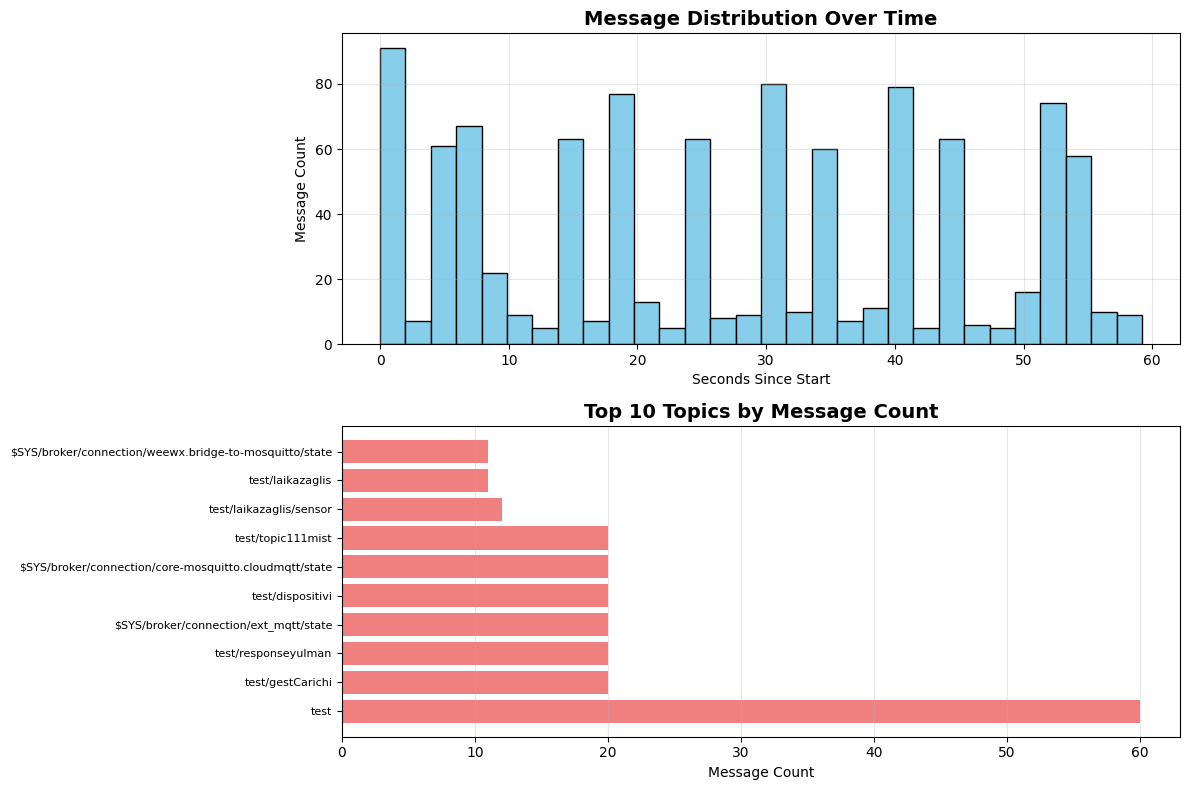


✅ Analysis complete! Ready for Step 5 (export).


In [26]:
# ========================================
# STEP 4: ANALYZE COLLECTED DATA
# ========================================

try:
    if not collected_data or len(collected_data) == 0:
        print("⚠️ No data collected yet! Please run Step 3 first (start_collection).")
        print("   If you just ran Step 3, make sure it completed successfully.")
    else:
        # Convert to DataFrame
        df = pd.DataFrame(list(collected_data))
        
        print("=" * 60)
        print("📊 DATA ANALYSIS REPORT")
        print("=" * 60)
        
        # Basic statistics
        print(f"\n📈 Collection Summary:")
        print(f"   • Total messages: {len(df)}")
        print(f"   • Unique topics: {df['topic'].nunique()}")
        print(f"   • Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
        
        # Topic breakdown
        print(f"\n📡 Topic Distribution:")
        topic_counts = df['topic'].value_counts()
        for topic, count in topic_counts.head(10).items():
            print(f"   • {topic}: {count} messages")
        
        # Sample messages
        print(f"\n📝 Sample Messages (first 3):")
        for idx, row in df.head(3).iterrows():
            print(f"\n   [{idx+1}] Topic: {row['topic']}")
            print(f"       Time: {row['timestamp']}")
            print(f"       Data: {row['data']}")
        
        # Visualization
        print(f"\n📊 Generating visualizations...")
        
        fig, axes = plt.subplots(2, 1, figsize=(12, 8))
        
        # Plot 1: Messages over time
        df['timestamp_dt'] = pd.to_datetime(df['timestamp'])
        df['second'] = (df['timestamp_dt'] - df['timestamp_dt'].min()).dt.total_seconds()
        
        axes[0].hist(df['second'], bins=30, color='skyblue', edgecolor='black')
        axes[0].set_title('Message Distribution Over Time', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Seconds Since Start')
        axes[0].set_ylabel('Message Count')
        axes[0].grid(True, alpha=0.3)
        
        # Plot 2: Topic frequency
        topic_counts_top = df['topic'].value_counts().head(10)
        axes[1].barh(range(len(topic_counts_top)), topic_counts_top.values, color='lightcoral')
        axes[1].set_yticks(range(len(topic_counts_top)))
        axes[1].set_yticklabels(topic_counts_top.index, fontsize=8)
        axes[1].set_title('Top 10 Topics by Message Count', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Message Count')
        axes[1].grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.show()
        
        print("\n✅ Analysis complete! Ready for Step 5 (export).")

except NameError:
    print("❌ ERROR: collected_data not found!")
    print("   → Please run Step 2 (setup) before Step 4 (analyze).")
    print("   → Make sure you ran the cells in order: Step 1 → Step 2 → Step 3 → Step 4")
except Exception as e:
    print(f"❌ Analysis error: {e}")
    print(f"   Check that Step 2 and Step 3 completed successfully.")

In [28]:
# ========================================
# STEP 5: INSPECT DATA STRUCTURE
# ========================================

try:
    if not collected_data or len(collected_data) == 0:
        print("⚠️ No data to inspect! Please run Step 3 first (start_collection).")
    else:
        # Convert to DataFrame
        df = pd.DataFrame(list(collected_data))
        
        print("=" * 70)
        print("📋 DATA STRUCTURE & HEADERS")
        print("=" * 70)
        
        # Show DataFrame info
        print(f"\n📊 DataFrame Shape: {df.shape[0]} rows × {df.shape[1]} columns")
        print(f"\n📌 Column Names:")
        for i, col in enumerate(df.columns, 1):
            print(f"   {i}. {col} ({df[col].dtype})")
        
        # Show first few rows
        print(f"\n🔍 First 5 Records:")
        print("-" * 70)
        for idx, row in df.head(5).iterrows():
            print(f"\nRecord #{idx + 1}:")
            print(f"  ├─ Timestamp: {row['timestamp']}")
            print(f"  ├─ Topic: {row['topic']}")
            print(f"  └─ Data: {row['data']}")
        
        # Show data types and sample values
        print(f"\n📈 Data Summary:")
        print(df.info())
        
        print(f"\n✅ Data structure displayed! Total records: {len(df)}")

except NameError:
    print("❌ ERROR: collected_data not found!")
    print("   → Please run Step 2 (setup) before Step 5.")
except Exception as e:
    print(f"❌ Inspection error: {e}")

📋 DATA STRUCTURE & HEADERS

📊 DataFrame Shape: 1000 rows × 3 columns

📌 Column Names:
   1. timestamp (object)
   2. topic (object)
   3. data (object)

🔍 First 5 Records:
----------------------------------------------------------------------

Record #1:
  ├─ Timestamp: 2025-12-19T15:13:38.447133
  ├─ Topic: $SYS/broker/plugin/events/persist/message/client/add
  └─ Data: 1782579

Record #2:
  ├─ Timestamp: 2025-12-19T15:13:38.447280
  ├─ Topic: $SYS/broker/plugin/events/persist/message/client/clear
  └─ Data: 95887616

Record #3:
  ├─ Timestamp: 2025-12-19T15:13:38.447419
  ├─ Topic: $SYS/broker/plugin/events/persist/message/client/delete
  └─ Data: 56960952293

Record #4:
  ├─ Timestamp: 2025-12-19T15:13:38.447589
  ├─ Topic: $SYS/broker/plugin/events/persist/message/client/update
  └─ Data: 302314

Record #5:
  ├─ Timestamp: 2025-12-19T15:13:38.447738
  ├─ Topic: $SYS/broker/plugin/events/persist/message/retain/delete
  └─ Data: 173702

📈 Data Summary:
<class 'pandas.core.frame.DataF

In [29]:
# ========================================
# STEP 6: ACCESS & MANIPULATE DATA
# ========================================

print("🔧 DATA ACCESS EXAMPLES")
print("=" * 70)

# 1. Access the raw deque
print(f"\n1️⃣ Raw collected_data (deque):")
print(f"   Length: {len(collected_data)}")
print(f"   Type: {type(collected_data)}")
print(f"   First item: {list(collected_data)[0]}")

# 2. Convert to DataFrame for easy manipulation
df = pd.DataFrame(list(collected_data))
print(f"\n2️⃣ DataFrame conversion:")
print(f"   Shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")

# 3. Access specific columns
print(f"\n3️⃣ Access columns:")
print(f"   Topics (first 3): {df['topic'].head(3).tolist()}")
print(f"   Timestamps (first 3): {df['timestamp'].head(3).tolist()}")

# 4. Extract numerical values from 'data' column
print(f"\n4️⃣ Extract numerical data:")
# Many $SYS messages contain raw numbers as strings
df['data_numeric'] = pd.to_numeric(df['data'].apply(lambda x: x if isinstance(x, (int, float, str)) else None), errors='coerce')
numeric_data = df[df['data_numeric'].notna()]
print(f"   Numeric records: {len(numeric_data)}/{len(df)}")
if len(numeric_data) > 0:
    print(f"   Sample numeric values: {numeric_data['data_numeric'].head(5).tolist()}")
    print(f"   Statistics:")
    print(f"      Mean: {numeric_data['data_numeric'].mean():.2f}")
    print(f"      Min: {numeric_data['data_numeric'].min():.2f}")
    print(f"      Max: {numeric_data['data_numeric'].max():.2f}")

# 5. Filter by topic
print(f"\n5️⃣ Filter data by topic:")
# Find topics with most messages
top_topics = df['topic'].value_counts().head(3)
print(f"   Top 3 topics:")
for topic, count in top_topics.items():
    print(f"      • {topic}: {count} messages")

# 6. Access specific records
print(f"\n6️⃣ Access specific records:")
print(f"   First record timestamp: {df.iloc[0]['timestamp']}")
print(f"   First record topic: {df.iloc[0]['topic']}")
print(f"   First record data: {df.iloc[0]['data']}")

# 7. Query by condition
print(f"\n7️⃣ Query by condition:")
example_topic = df['topic'].iloc[0]
filtered = df[df['topic'] == example_topic]
print(f"   Messages with topic '{example_topic}': {len(filtered)}")

# 8. Time-based analysis
print(f"\n8️⃣ Time-based access:")
df['timestamp_dt'] = pd.to_datetime(df['timestamp'])
df['seconds_elapsed'] = (df['timestamp_dt'] - df['timestamp_dt'].min()).dt.total_seconds()
print(f"   Time range: {df['seconds_elapsed'].min():.1f}s to {df['seconds_elapsed'].max():.1f}s")
print(f"   Messages per second: {len(df) / df['seconds_elapsed'].max():.2f}")

# 9. Export to variables
print(f"\n9️⃣ Extract to Python variables:")
timestamps_list = df['timestamp'].tolist()
topics_list = df['topic'].tolist()
data_list = df['data'].tolist()
print(f"   ✅ Created: timestamps_list, topics_list, data_list")
print(f"   Example access: timestamps_list[0] = '{timestamps_list[0]}'")

print("\n" + "=" * 70)
print("💡 TIP: Use 'df' variable for pandas operations")
print("💡 TIP: Use 'collected_data' for raw deque operations")
print("=" * 70)

🔧 DATA ACCESS EXAMPLES

1️⃣ Raw collected_data (deque):
   Length: 1000
   Type: <class 'collections.deque'>
   First item: {'timestamp': '2025-12-19T15:13:38.447133', 'topic': '$SYS/broker/plugin/events/persist/message/client/add', 'data': 1782579}

2️⃣ DataFrame conversion:
   Shape: (1000, 3)
   Columns: ['timestamp', 'topic', 'data']

3️⃣ Access columns:
   Topics (first 3): ['$SYS/broker/plugin/events/persist/message/client/add', '$SYS/broker/plugin/events/persist/message/client/clear', '$SYS/broker/plugin/events/persist/message/client/delete']
   Timestamps (first 3): ['2025-12-19T15:13:38.447133', '2025-12-19T15:13:38.447280', '2025-12-19T15:13:38.447419']

4️⃣ Extract numerical data:
   Numeric records: 810/1000
   Sample numeric values: [1782579.0, 95887616.0, 56960952293.0, 302314.0, 173702.0]
   Statistics:
      Mean: 217912363614.19
      Min: 0.00
      Max: 11064347407833.00

5️⃣ Filter data by topic:
   Top 3 topics:
      • test: 60 messages
      • test/gestCarichi: 2

In [30]:
# Get specific value
first_value = df.iloc[0]['data']

# Filter specific topics
sys_load = df[df['topic'].str.contains('load')]

# Get numeric statistics
numeric_vals = pd.to_numeric(df['data'], errors='coerce')
print(numeric_vals.mean())

217912363614.1929


In [32]:
# ========================================
# VIEW NUMERIC DATA HEADS
# ========================================

print("📊 NUMERIC DATA HEADERS & GROUPS")
print("=" * 80)

# 1. Get only numeric records
numeric_df = df[df['data_numeric'].notna()].copy()

print(f"\n1️⃣ FIRST 10 NUMERIC RECORDS (Data Head):")
print("-" * 80)
print(numeric_df[['timestamp', 'topic', 'data_numeric']].head(10).to_string())

print(f"\n\n2️⃣ STATISTICS BY TOPIC (Grouped Data):")
print("-" * 80)
stats_by_topic = numeric_df.groupby('topic')['data_numeric'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('min', 'min'),
    ('max', 'max'),
    ('std', 'std')
]).round(2)

# Show top 10 topics by message count
print(stats_by_topic.sort_values('count', ascending=False).head(10).to_string())

print(f"\n\n3️⃣ SAMPLE FROM EACH TOP TOPIC:")
print("-" * 80)
top_3_topics = numeric_df['topic'].value_counts().head(3).index

for topic in top_3_topics:
    topic_data = numeric_df[numeric_df['topic'] == topic]
    print(f"\n📌 Topic: {topic}")
    print(f"   Count: {len(topic_data)} records")
    print(f"   Data head (first 3 values):")
    for idx, row in topic_data.head(3).iterrows():
        print(f"      • {row['timestamp'][:19]} → {row['data_numeric']:.2f}")

print(f"\n\n4️⃣ FULL NUMERIC DATAFRAME INFO:")
print("-" * 80)
print(f"Shape: {numeric_df.shape}")
print(f"Columns: {list(numeric_df.columns)}")
print(f"\nFirst 5 complete records:")
print(numeric_df.head().to_string())

print("\n" + "=" * 80)
print("💡 TIP: Use numeric_df.head(20) to see more records")
print("💡 TIP: Use numeric_df[numeric_df['topic'].str.contains('load')] to filter")
print("=" * 80)

📊 NUMERIC DATA HEADERS & GROUPS

1️⃣ FIRST 10 NUMERIC RECORDS (Data Head):
--------------------------------------------------------------------------------
                    timestamp                                                    topic  data_numeric
0  2025-12-19T15:13:38.447133     $SYS/broker/plugin/events/persist/message/client/add  1.782579e+06
1  2025-12-19T15:13:38.447280   $SYS/broker/plugin/events/persist/message/client/clear  9.588762e+07
2  2025-12-19T15:13:38.447419  $SYS/broker/plugin/events/persist/message/client/delete  5.696095e+10
3  2025-12-19T15:13:38.447589  $SYS/broker/plugin/events/persist/message/client/update  3.023140e+05
4  2025-12-19T15:13:38.447738  $SYS/broker/plugin/events/persist/message/retain/delete  1.737020e+05
5  2025-12-19T15:13:38.447890     $SYS/broker/plugin/events/persist/message/retain/set  1.898030e+05
6  2025-12-19T15:13:38.448050                $SYS/broker/plugin/events/persist/restore  1.000000e+00
7  2025-12-19T15:13:38.448211       

Mean: 217912363614.1929
Median: 1146325.5
Std Dev: 1314879053894.5107


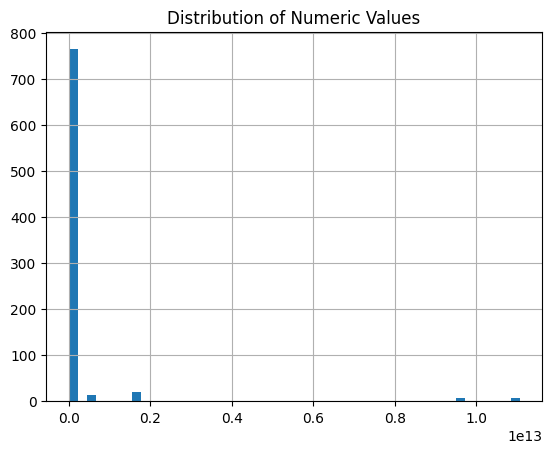

<Axes: xlabel='seconds_elapsed'>

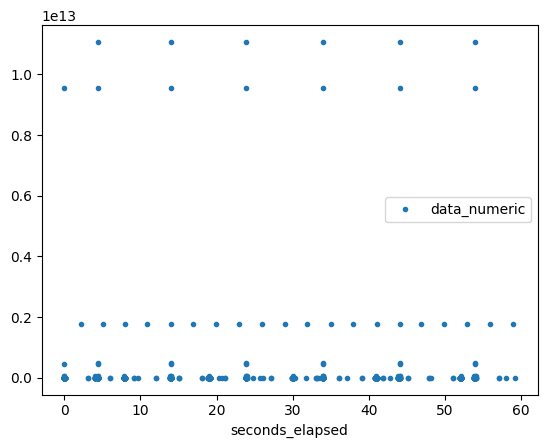

In [31]:
# Already working! See Cell 13
numeric_vals = pd.to_numeric(df['data'], errors='coerce')
print(f"Mean: {numeric_vals.mean()}")
print(f"Median: {numeric_vals.median()}")
print(f"Std Dev: {numeric_vals.std()}")

# Get only messages with numeric data
numeric_df = df[df['data_numeric'].notna()]

# Calculate statistics per topic
stats_by_topic = numeric_df.groupby('topic')['data_numeric'].agg(['mean', 'min', 'max', 'count'])

import matplotlib.pyplot as plt
numeric_df['data_numeric'].hist(bins=50)
plt.title('Distribution of Numeric Values')
plt.show()

# Plot how values change over time
numeric_df.plot(x='seconds_elapsed', y='data_numeric', style='.')